**G2M INSIGHT FOR CAB INVESTMENT FIRM**

The Client XYZ is a private firm in US and due to remarkable growth in the Cab Industry in last 
few years and multiple key players in the market, it is planning for an investment in Cab industry 
and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

The aim of this project is to help the client XYZ to make a decision based on the analysis. 
This project analysis will be carried out using the crisp-dm methodology to help in the work flow of this project.

CRISPS-DM Methodology:
The cross-industry standard practice for data mining process has been extensively used to 
carry out most data analysis or mining project. The CRISP-DM data mining methodology 
published in 2000 which outline the steps the needs to be adhered to when performing a 
data mining process to achieve the outmost results.
* Business understanding
* Data understanding
* Data Preparation
* Data modelling
* Evaluation
* Deployment

Business understanding:   
[According to ibis industry statistics](https://www.ibisworld.com/industry-statistics/market-size/taxi-limousine-services-united-states/) ,the taxi market was valued at USD 213.14 Billion in 2021 and it is projected to reach USD 356.47 Billion by 2027, registering a CAGR of 8.95% during the forecast period 2022 - 2027.

Data understanding:  
This will be taken care of by using the Data Intakle Report which will explain the datasets into detail laying emphasis on
the following
* Data types
* Missing values

Data Preparation:   
The most complex and tedious stage of the process where the data collected needs to 
be prepared in line with the business plan. 
In this stage the main objective includes cleaning the data, dealing with missing and unknown values, reducing data dimensionality, transforming data values, and sometimes reformatting the data to suite the desired mining solution. Other operations performed under this stage includes data aggregation, normalisation, and attribute creation i.e.,
making new variables to tackle specific business queries, other areas to be lookked at will include 
* Descriptive Statistics
* General Visualisation


#### IMPORTING PACKAGES

In [89]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
import xlrd
from datetime import datetime, date, time, timedelta
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default="svg"

#### DATA PREPARATION:
#### Importing the dta sets.

In [90]:
cab = pd.read_csv(r'C:\Users\TALEHOUSE\Downloads\DataSets\Cab_Data.csv')
city  = pd.read_csv(r'C:\Users\TALEHOUSE\Downloads\DataSets\City.csv')
customer  = pd.read_csv(r'C:\Users\TALEHOUSE\Downloads\DataSets\Customer_ID.csv')
transaction  = pd.read_csv(r'C:\Users\TALEHOUSE\Downloads\DataSets\Transaction_ID.csv')

In [91]:
# For the Cab_Data, the dates are presented in a excel serial format.
# To convert excel serial date into python for data set Cab containg Date of Travel.
cab["Date of Travel"] = cab["Date of Travel"].map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))

# To remove the timsstamp from dates
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'],errors='coerce')

cab['Date of Travel'] = cab['Date of Travel'].dt.date

In [92]:
# GENERAL EDA ON ALL DATA SETS
# Data Exploration

In [93]:
# To see the shape of the dataset.
cab.shape 

(359392, 7)

In [94]:
# To show the first 5 rows of the data 
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [95]:
# To show the last 5 rows of the data
cab.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [96]:
# To describe the variables in the data showing their data types
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [97]:
# To display the basic statistcs of the data.
cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [98]:
# shows the various data types in the data.
cab.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [99]:
# To see the number of columns in the data set.
# Also shows you the columns and their data types.
cab.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [100]:
# To show if there are any missing value in the data
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [101]:
# shows there are no missing values.

#### City data set

In [102]:
# To see the shape of the dataset.
city.shape 

(20, 3)

In [103]:
# To show the first 5 rows of the data 
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [104]:
# To show the last 5 rows of the data
city.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [105]:
# To describe the variables in the data showing their data types
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [106]:
# To display the basic statistcs of the data.
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [107]:
# shows the various data types in the data.
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [108]:
# Also shows you the columns and their data types.
city.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [109]:
# To show if there are any missing value in the data
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [110]:
# shows there are no missing values

#### Customer data set

In [111]:
# To see the shape of the dataset.
customer.shape 

(49171, 4)

In [112]:
# To show the first 5 rows of the data 
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [113]:
# To show the last 5 rows of the data
customer.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [114]:
# To describe the variables in the data showing their data types
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [115]:
# To display the basic statistcs of the data.
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [116]:
# shows the various data types in the data.
customer.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [117]:
# To see the number of columns in the data set.
# Also shows you the columns and their data types.
customer.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [118]:
# To show if there are any missing value in the data
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [119]:
# shows there are no missing values.

#### Transaction data set

In [120]:
# To see the shape of the dataset.
transaction.shape 

(440098, 3)

In [121]:
# To show the first 5 rows of the data 
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [122]:
# To show the last 5 rows of the data
transaction.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [123]:
# To describe the variables in the data showing their data types
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [124]:
# To display the basic statistcs of the data.
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [125]:
# shows the various data types in the data.
transaction.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [126]:
# To see the number of columns in the data set.
# Also shows you the columns and their data types.
transaction.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [127]:
# To show if there are any missing value in the data
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [128]:
# shows there are no missing values.

####  DATA TRANSFORMATION

In [129]:
# Rename the cab data column Date of Travel to Date
cab = cab.rename(columns = {'Date of Travel':'Date'})
# Rename the customer data column Income (USD/Month) to Income
customer = customer.rename(columns = {'Income (USD/Month)':'Income'})
# To remove commas from column values
city = city.replace(',','',  regex=True, inplace=False)

In [130]:
# Changing data type of columns to it's correct type to help in the analysis.

city["Population"] = pd.to_numeric(city["Population"])
city["Users"] = pd.to_numeric(city["Users"])

# To convert the date into year and month to help in the analysis.
cab['Date'] = cab['Date'].astype('datetime64')

cab['Year'] = cab['Date'].dt.year
cab['Month'] = cab['Date'].dt.month

In [131]:
# MERGING ALL DATA SETS
# Merging all dta sets to create the master data called Cab_df

In [132]:
Cab_df1 = pd.merge(customer, transaction, on ='Customer ID')

Cab_df2 = pd.merge(cab, city, on ='City')

In [133]:
# Finally to create the master Cab data.

Cab_df= pd.merge(Cab_df1, Cab_df2, on ='Transaction ID')

In [134]:
# Exploratory on the master Cab data

In [135]:
# To see the shape of the master data set
Cab_df.shape

(359392, 16)

In [136]:
# To see the number of columns in the data set.
# Also shows you the columns and their data types.
Cab_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income', 'Transaction ID',
       'Payment_Mode', 'Date', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Year', 'Month', 'Population',
       'Users'],
      dtype='object')

In [137]:
# To describe the variables in the data showing their data types
Cab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Customer ID     359392 non-null  int64         
 1   Gender          359392 non-null  object        
 2   Age             359392 non-null  int64         
 3   Income          359392 non-null  int64         
 4   Transaction ID  359392 non-null  int64         
 5   Payment_Mode    359392 non-null  object        
 6   Date            359392 non-null  datetime64[ns]
 7   Company         359392 non-null  object        
 8   City            359392 non-null  object        
 9   KM Travelled    359392 non-null  float64       
 10  Price Charged   359392 non-null  float64       
 11  Cost of Trip    359392 non-null  float64       
 12  Year            359392 non-null  int64         
 13  Month           359392 non-null  int64         
 14  Population      359392 non-null  int

#### FEATURE ENGINEERING as part of the Data Preparation
#### Feature Engineering : To derive some interested features for  analysis

In [138]:
Cab_df['Profit_margin'] = Cab_df['Price Charged'] - Cab_df['Cost of Trip']
Cab_df['Profit_Rate'] = ((Cab_df['Price Charged'] - Cab_df['Cost of Trip'])/Cab_df['Cost of Trip'])*100
Cab_df['User_Ratio'] = Cab_df['Users']/Cab_df['Population']*100
Cab_df['Profit_per_KM'] = Cab_df['Profit_margin']/ Cab_df['KM Travelled']
Cab_df['Market_size'] = Cab_df['Price Charged'] * Cab_df['Users']

In [139]:
# To find the relationships amongst the newly created features.

In [140]:
new_features  = ['Profit_margin', 'Profit_Rate', 'User_Ratio', 'Profit_per_KM','Market_size']

df1 = Cab_df[['Profit_margin', 'Profit_Rate', 'User_Ratio', 'Profit_per_KM','Market_size']]

In [141]:
# To show the correlations
df1.corr()

,Profit_margin,Profit_Rate,User_Ratio,Profit_per_KM,Market_size
Profit_margin,1.000000,0.775171,-0.274715,0.779330,0.855040
Profit_Rate,0.775171,1.000000,-0.356789,0.994458,0.620466
User_Ratio,-0.274715,-0.356789,1.000000,-0.353537,-0.244611
Profit_per_KM,0.779330,0.994458,-0.353537,1.000000,0.632314
Market_size,0.855040,0.620466,-0.244611,0.632314,1.000000


In [142]:
# Also to show this by heat map.

<AxesSubplot:>

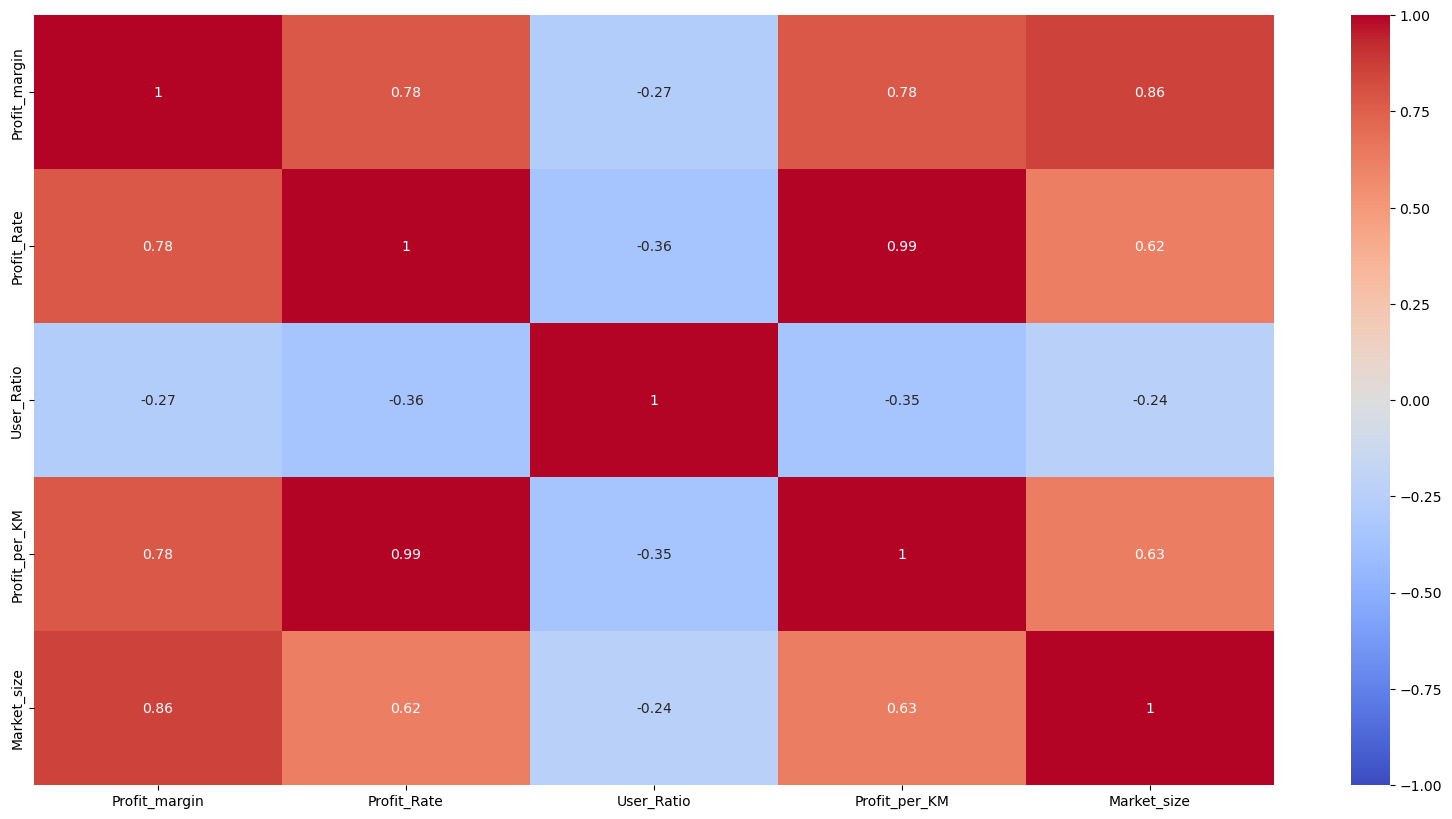

In [143]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

From the above,  
The above shows a 99% stong and positive relationship between  
* Profit_margin and Market_size
* Profit_Rate and Profit_per_KM    
Also there is a 87% strong and  positive relationship between
* Profit_margin and Profit_Rate
* Profit_margin and Profit_per_KM

#### INVESTIGATIONS

In [144]:
# Splitted master data into two dataset for every Cab Firm to analyze them individually.

In [145]:
Pink_Cab_df = Cab_df [Cab_df['Company'] == 'Pink Cab'] 
Yellow_Cab_df = Cab_df [Cab_df['Company'] == 'Yellow Cab']

#### Pink & Yellow Cab Firm Profit_Rate Distribution by the Year

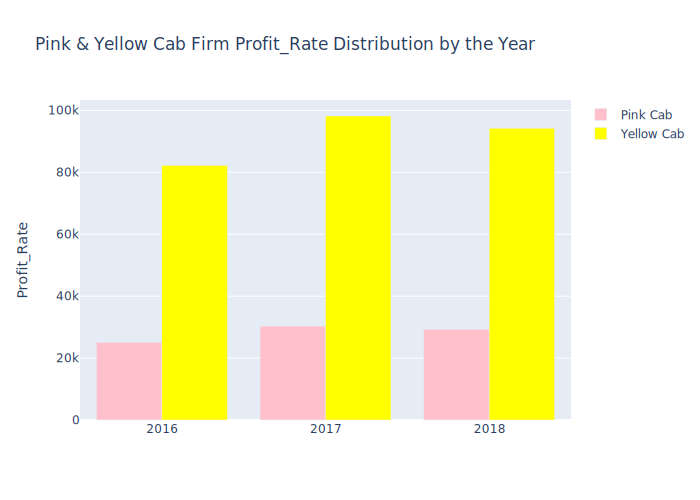

In [147]:
Pink_PR_df = Pink_Cab_df.groupby(['Company','Year'])['Profit_Rate'].count().reset_index()
Yellow_PR_df  = Yellow_Cab_df.groupby(['Company','Year'])['Profit_Rate'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_PR_df.Year,
                    y=Pink_PR_df['Profit_Rate'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_PR_df.Year,
                    y=Yellow_PR_df['Profit_Rate'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Profit_Rate",
    title="Pink & Yellow Cab Firm Profit_Rate Distribution by the Year" )

The yellow and pink cab firms showed a high profit rate in 2017 with the  
yellow cab firm showing more profit rate than the Pink cab firm over the years.

#### Pink & Yellow Cab Firm Profit_margin Distribution by the Year

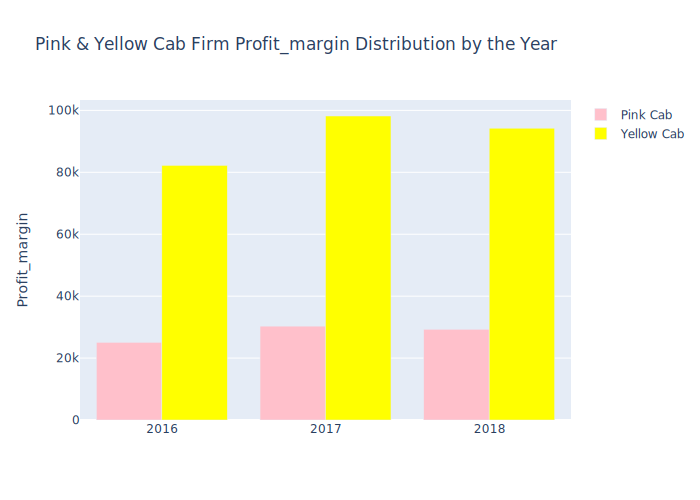

In [149]:
Pink_PM_df = Pink_Cab_df.groupby(['Company','Year'])['Profit_margin'].count().reset_index()
Yellow_PM_df = Yellow_Cab_df.groupby(['Company','Year'])['Profit_margin'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_PM_df.Year,
                    y=Pink_PM_df['Profit_margin'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_PM_df.Year,
                    y=Yellow_PM_df['Profit_margin'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Profit_margin",
    title="Pink & Yellow Cab Firm Profit_margin Distribution by the Year" )

The Yellow cab firm made the most profit margin over the years than Pink cab firm  
Also there was a high profit margin recorded in 2017

#### Pink & Yellow Cab Firm User_Ratio Distribution by the Year

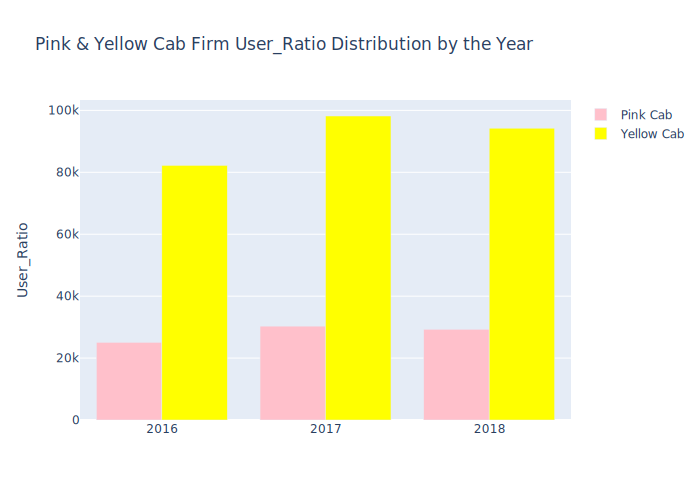

In [151]:
Pink_UR_df = Pink_Cab_df.groupby(['Company','Year'])['User_Ratio'].count().reset_index()
Yellow_UR_df = Yellow_Cab_df.groupby(['Company','Year'])['User_Ratio'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_UR_df.Year,
                    y=Pink_UR_df['User_Ratio'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_UR_df.Year,
                    y=Yellow_UR_df['User_Ratio'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="User_Ratio",
    title="Pink & Yellow Cab Firm User_Ratio Distribution by the Year" )

The user ratio for Yellow cab firm was more than the Pink cab firm.  
2017 recorded more yellow cab users than pink cab firm.

#### Pink & Yellow Cab Firm Market_size  by the Year

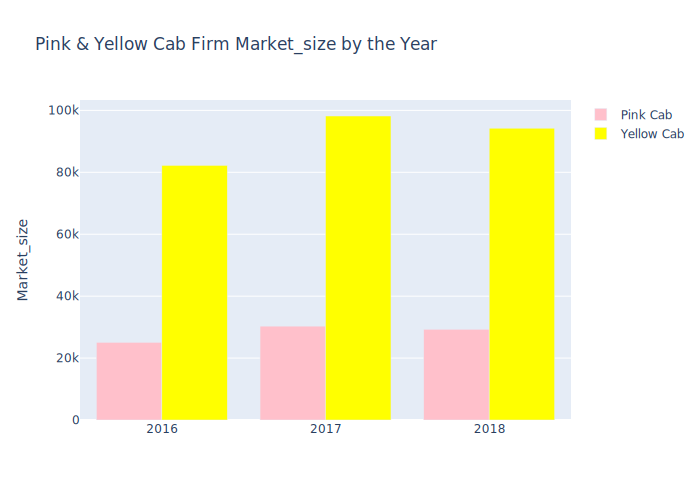

In [154]:
Pink_PM_df = Pink_Cab_df.groupby(['Company','Year'])['Market_size'].count().reset_index()
Yellow_PM_df = Yellow_Cab_df.groupby(['Company','Year'])['Market_size'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_PM_df.Year,
                    y=Pink_PM_df['Market_size'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_PM_df.Year,
                    y=Yellow_PM_df['Market_size'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Market_size",
    title="Pink & Yellow Cab Firm Market_size by the Year" )

The Yellow cab firm had the biggest market size over the years than Pink cab firm  
Also there was a high market size recorded in 2017 for both cab firms.

#### Pink & Yellow Cab Firm Profit_per_KM by the Year 

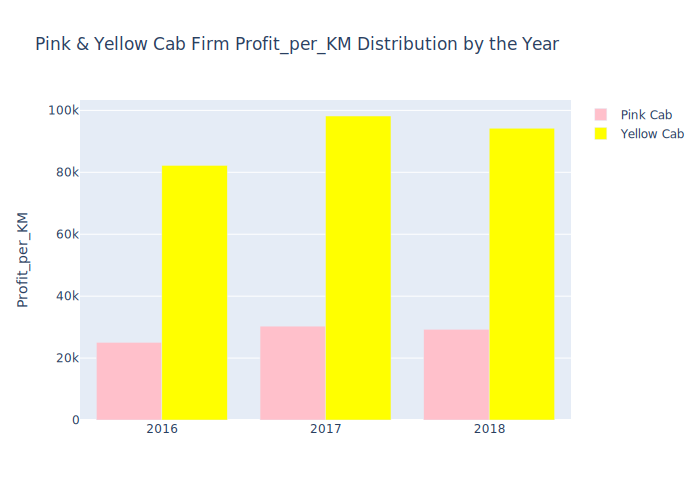

In [156]:
Pink_U_df = Pink_Cab_df.groupby(['Company','Year'])['Profit_per_KM'].count().reset_index()
Yellow_U_df = Yellow_Cab_df.groupby(['Company','Year'])['Profit_per_KM'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_U_df.Year,
                    y=Pink_U_df['Profit_per_KM'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_U_df.Year,
                    y=Yellow_U_df['Profit_per_KM'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Profit_per_KM",
    title="Pink & Yellow Cab Firm Profit_per_KM Distribution by the Year" )

The yellow cab firm had the highest profit per KM than the Pink cab firm  
Also 2017 recorded the highest profit per KM for both Yellow and Pink cab firms.

#### Pink & Yellow Cab Firm Users Distribution by the Year

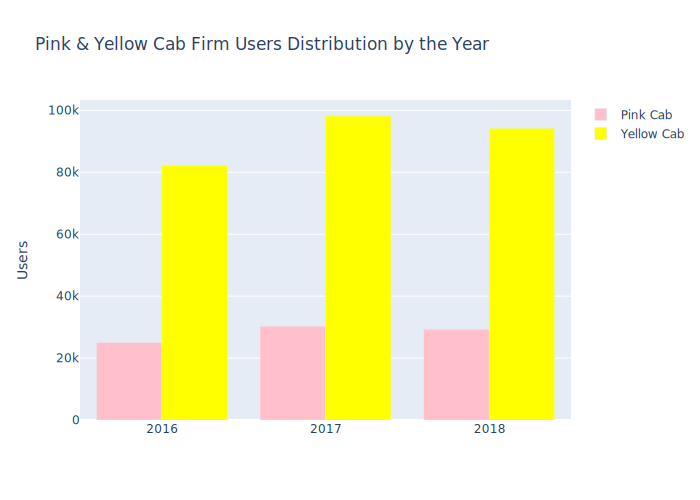

In [75]:
Pink_U_df = Pink_Cab_df.groupby(['Company','Year'])['Users'].count().reset_index()
Yellow_U_df = Yellow_Cab_df.groupby(['Company','Year'])['Users'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_U_df.Year,
                    y=Pink_U_df['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_U_df.Year,
                    y=Yellow_U_df['Users'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution by the Year" )

There were more Yellow cab users over the years than Pink cab users      
In 2017 more people used Yellow cab than Pink cab   

#### Pink & Yellow Cab Firm Income Distribution by the Year

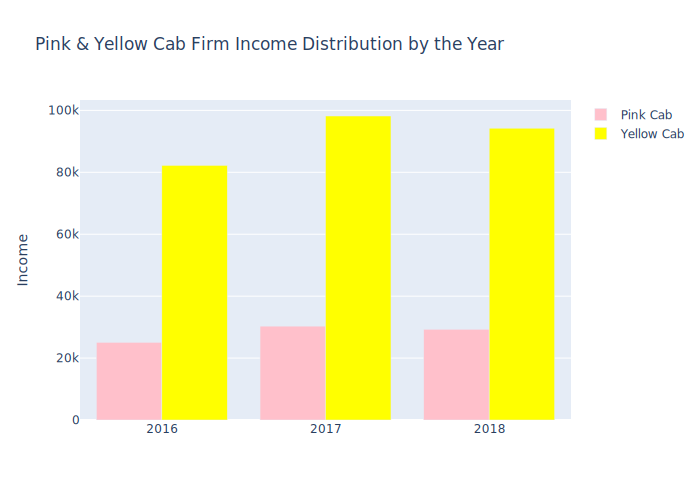

In [78]:
Pink_I_df = Pink_Cab_df.groupby(['Company','Year'])['Income'].count().reset_index()
Yellow_I_df = Yellow_Cab_df.groupby(['Company','Year'])['Income'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_I_df.Year,
                    y=Pink_I_df['Income'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_I_df.Year,
                    y=Yellow_I_df['Income'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Income",
    title="Pink & Yellow Cab Firm Income Distribution by the Year" )

High income earners used the Yellow cab than the Pink cab   
2017 registered the highest income records for both firms  

#### The distribution of users over city 

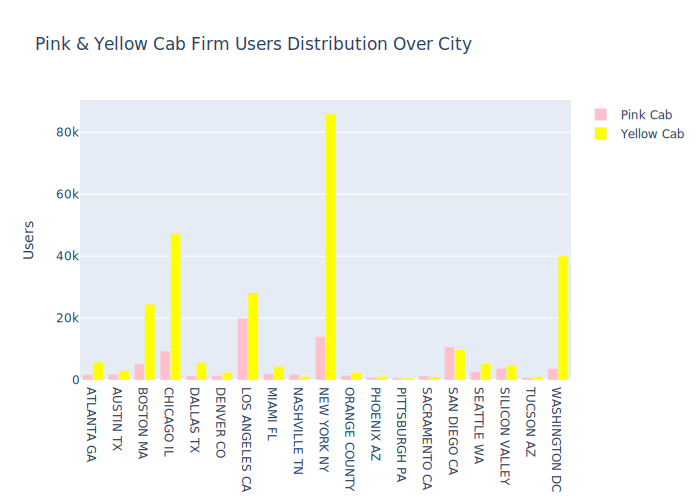

In [81]:
Pink_CC_df = Pink_Cab_df.groupby(['City'])['Company'].count().reset_index()
Yellow_CC_df = Yellow_Cab_df.groupby(['City'])['Company'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_CC_df.City,
                    y=Pink_CC_df['Company'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_CC_df.City,
                    y=Yellow_CC_df['Company'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over City" ) 

From the Bar Chart, the Yellow Cab firm,records showed the highest number of users  
on a city basis are in New York, Washington and Chicago, while for the Pink Cab Company,   
the most are in Los Angeles, New York and San Diego  

#### The distribution of users by gender

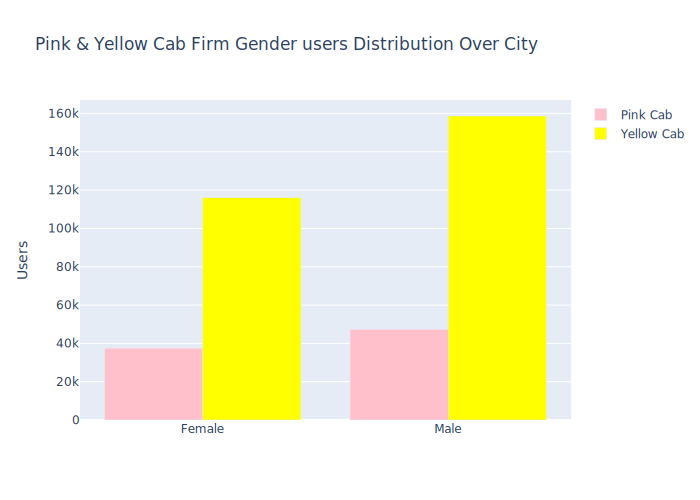

In [84]:
Pink_CC_df = Pink_Cab_df.groupby(['Gender'])['Company'].count().reset_index()
Yellow_CC_df = Yellow_Cab_df.groupby(['Gender'])['Company'].count().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=Pink_CC_df.Gender,
                    y=Pink_CC_df['Company'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=Yellow_CC_df.Gender,
                    y=Yellow_CC_df['Company'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Gender users Distribution Over City" )

More males used the Yellow cab firm were than females.   

#### Total Users Overview by Payment Method

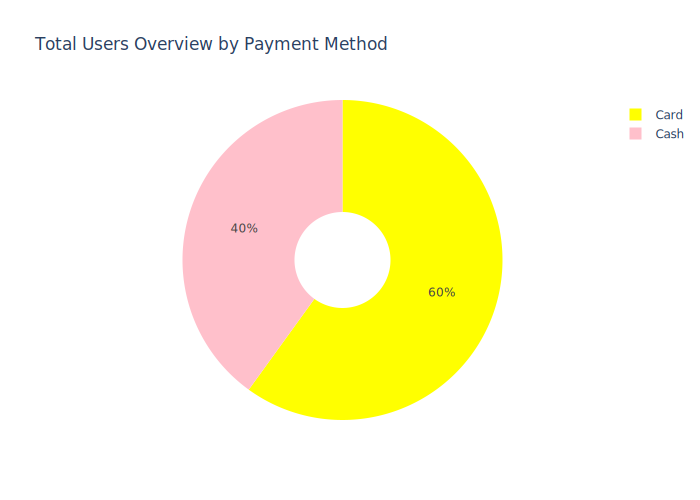

In [87]:
Payment_method_df = Cab_df.groupby("Payment_Mode").count()

fig6 = px.pie(Payment_method_df, values=Payment_method_df.Users, names=Payment_method_df.index,hole=0.3,
              color_discrete_sequence=['yellow', 'pink'],
              title="Total Users Overview by Payment Method" )

fig6.show()

Yellow cab firm mostly used card payment than cash.  

#### RECOMMENDATIONS FROM THE ANALYSIS

In conclusion the analysis showed that the operations on the Yellow cab firm achieved more than the Pink cab firm in that it recorded appreciably more and high value in the the following  

* Profit_margin 
* Profit_Rate 
* User_Ratio 
* Profit_per_KM
* Market_size

Hence to advise the XYZ investment about which company to invest in will be the Yellow cab firm since it surpass it's competitors in all grounds.  